In [13]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import (
    accuracy_score, rand_score, precision_score,
    recall_score, adjusted_rand_score, normalized_mutual_info_score,
    f1_score, homogeneity_score, completeness_score, v_measure_score,
    calinski_harabasz_score, davies_bouldin_score, silhouette_score)


In [14]:
def plot_clustering(X, y, y_pred):
  plt.figure(figsize=(15, 5))
  plt.subplot(131)
  plt.scatter(X[:, 0], X[:, 1]) # -->  raw data scatter plot
  plt.title("Incorrect Number of Clusters")

  plt.subplot(132)
  plt.scatter(X[:, 0], X[:, 1], c=y) # -->  scatter plot with coloring based on the original labels
  plt.title("Original values")

  plt.subplot(133)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred) # --> coloring based on the kmeans prediction
  plt.title("K-means clustering result")

  plt.show()

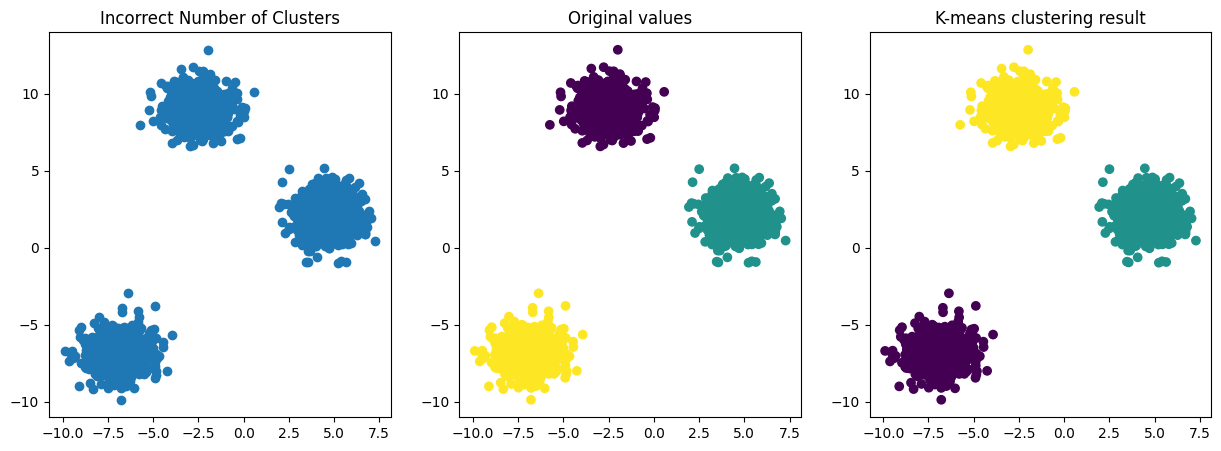

In [15]:
# Create samples for clustering

n_samples = 1500 # --> sample size
random_state = 42 # --> seed for the random number generation used in cluster centroid initialization
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3) # --> generate data to be clustered

model = KMeans(n_clusters=3, random_state=random_state, n_init='auto').fit(X) # --> create clustering model as object
y_pred = model.predict(X)

plot_clustering(X, y, y_pred)

In [16]:
def print_underscore_text(text):
  print(f"\033[4m{text}\033[0m")

In [17]:
def evaluate_clustering(X, y, y_pred, model):
  print_underscore_text('External measures:\n')
  print(f'- Rand index: {round(rand_score(y, y_pred), 2)}')
  print(f'- Adjusted Rand index: {round(adjusted_rand_score(y, y_pred), 2)}')
  print(f'- Normalized mutual information: {round(normalized_mutual_info_score(y, y_pred), 2)}')

  print(f'- Homogeneity: {round(homogeneity_score(y, y_pred), 2)}')
  print(f'- Completeness: {round(completeness_score(y, y_pred), 2)}')
  print(f'- V-measure: {round(v_measure_score(y, y_pred), 2)}')

  print_underscore_text('\nInternal measures:\n')

  print(f'- Silhouette Coefficient: {round(silhouette_score(X, model.labels_))}')
  print(f'- Calinski-Harabasz: {round(calinski_harabasz_score(X, model.labels_))}')
  print(f'- Davies-Bouldin: {round(davies_bouldin_score(X, model.labels_))}')

In [18]:
evaluate_clustering(X, y, y_pred, model)

External measures:

- Rand index: 1.0
- Adjusted Rand index: 1.0
- Normalized mutual information: 1.0
- Homogeneity: 1.0
- Completeness: 1.0
- V-measure: 1.0

Internal measures:

- Silhouette Coefficient: 1
- Calinski-Harabasz: 25006
- Davies-Bouldin: 0


## Number of clusters

External measures:

- Rand index: 0.94
- Adjusted Rand index: 0.87
- Normalized mutual information: 0.91
- Homogeneity: 1.0
- Completeness: 0.83
- V-measure: 0.91

Internal measures:

- Silhouette Coefficient: 1
- Calinski-Harabasz: 18745
- Davies-Bouldin: 1


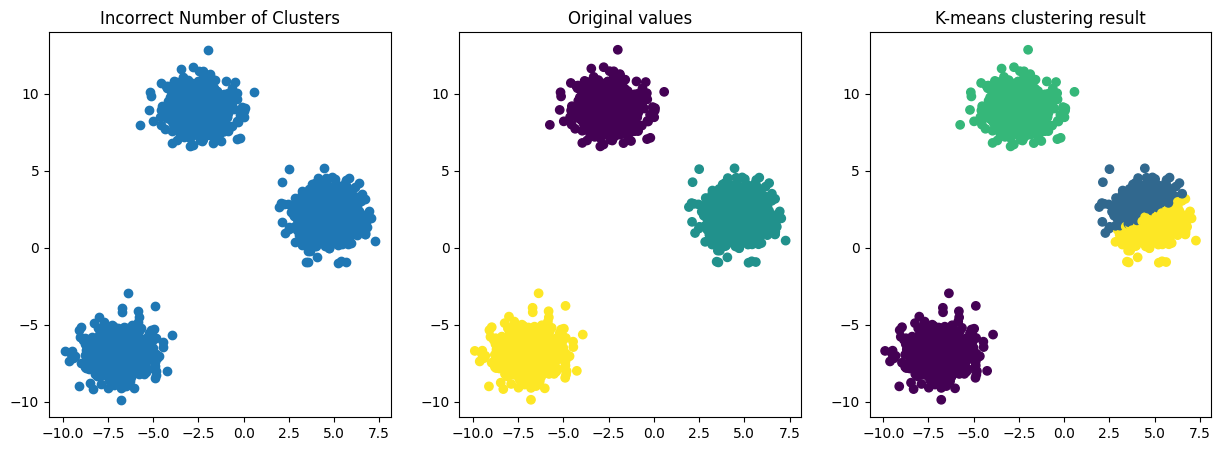

In [19]:
n_samples = 1500
random_state = 42
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)

model = KMeans(n_clusters=4, random_state=random_state, n_init="auto").fit(X)
y_pred = model.predict(X)


evaluate_clustering(X, y, y_pred, model)
plot_clustering(X, y, y_pred)

External measures:

- Rand index: 0.78
- Adjusted Rand index: 0.57
- Normalized mutual information: 0.73
- Homogeneity: 0.58
- Completeness: 1.0
- V-measure: 0.73

Internal measures:

- Silhouette Coefficient: 1
- Calinski-Harabasz: 3866
- Davies-Bouldin: 0


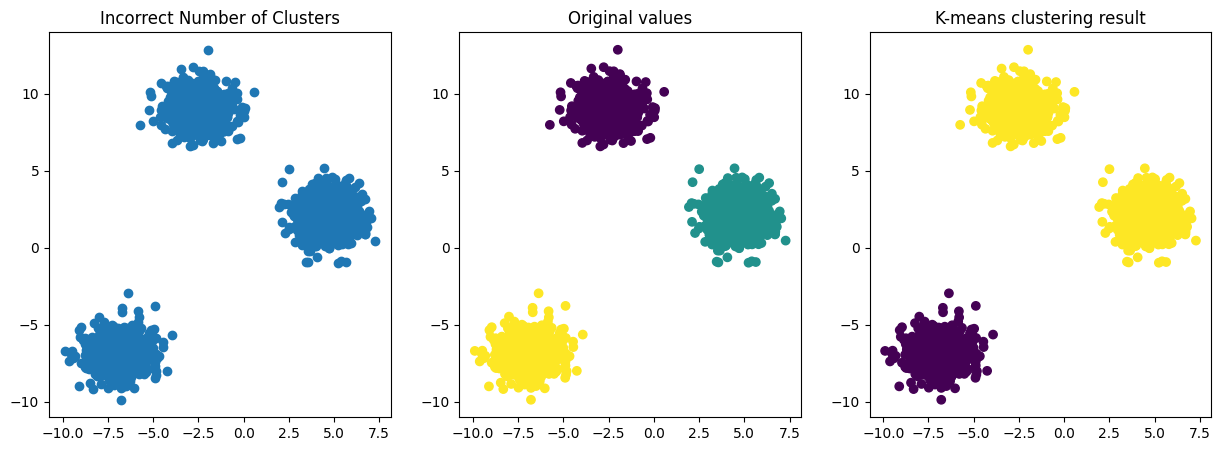

In [20]:
model = KMeans(n_clusters=2, random_state=random_state, n_init="auto").fit(X)
y_pred = model.predict(X)

evaluate_clustering(X, y, y_pred, model)
plot_clustering(X, y, y_pred)

For n_clusters = 2 The average silhouette_score is : 0.7068830676413169
For n_clusters = 3 The average silhouette_score is : 0.8433650914680958
For n_clusters = 4 The average silhouette_score is : 0.6629499609120292
For n_clusters = 5 The average silhouette_score is : 0.669829139720942
For n_clusters = 6 The average silhouette_score is : 0.5101609616156318


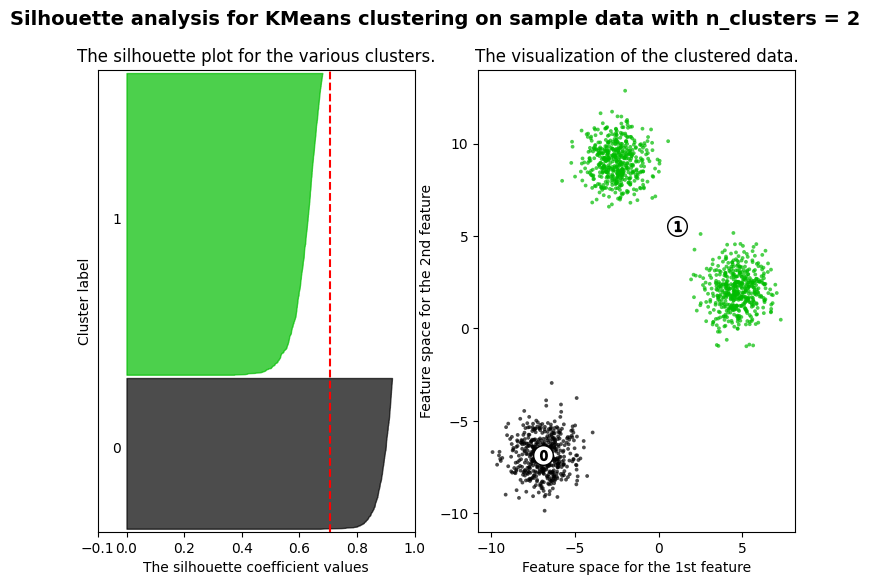

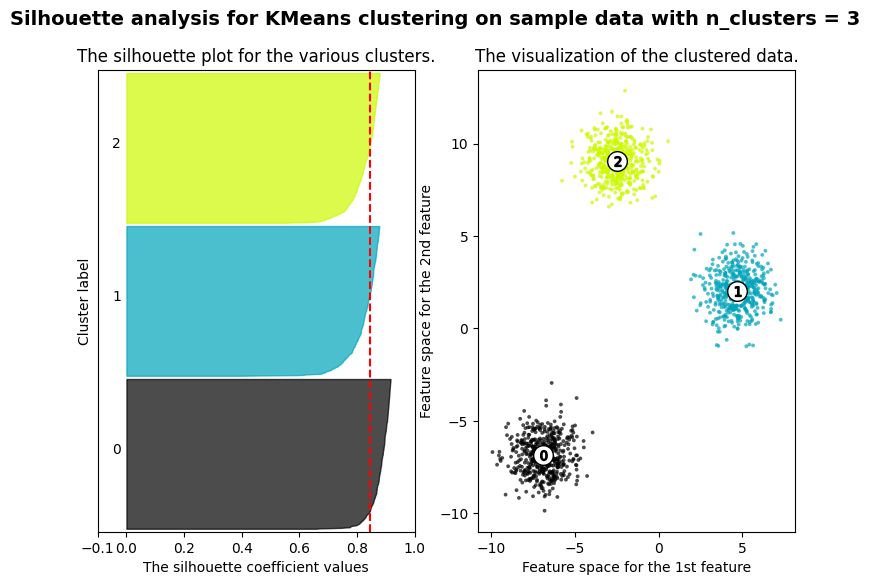

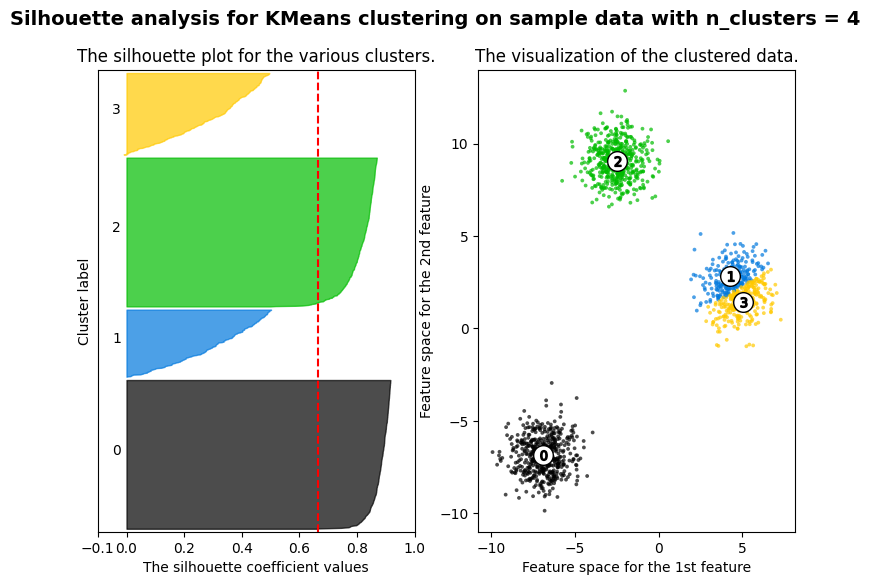

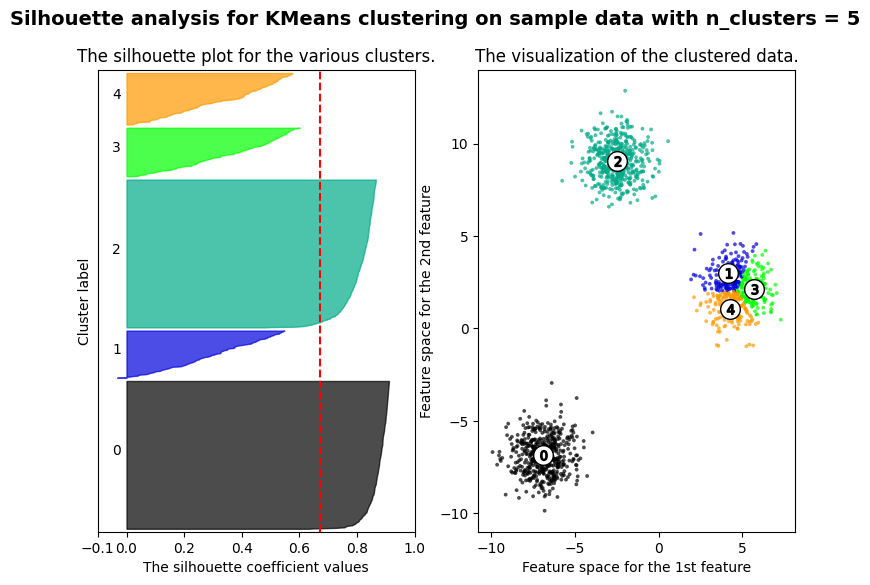

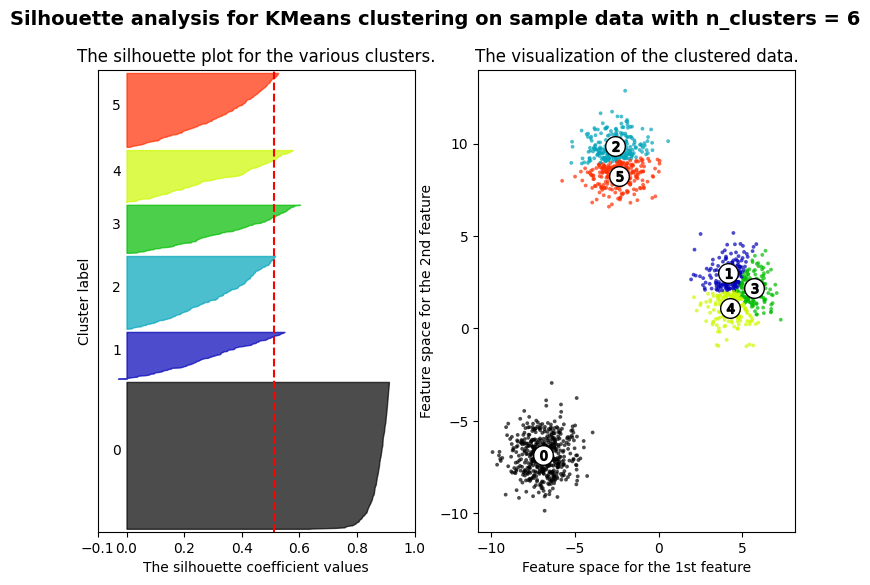

In [21]:
import matplotlib.cm as cm

from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(9, 6)

    # first subplot: silhouette plot
    # the silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # initialize KMeans with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=random_state)
    cluster_labels = clusterer.fit_predict(X)

    # the silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # second plot: clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # labeling the clusters
    centers = clusterer.cluster_centers_
    # draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Anisotropic data

External measures:

- Rand index: 0.85
- Adjusted Rand index: 0.67
- Normalized mutual information: 0.65
- Homogeneity: 0.65
- Completeness: 0.65
- V-measure: 0.65

Internal measures:

- Silhouette Coefficient: 0
- Calinski-Harabasz: 1789
- Davies-Bouldin: 1


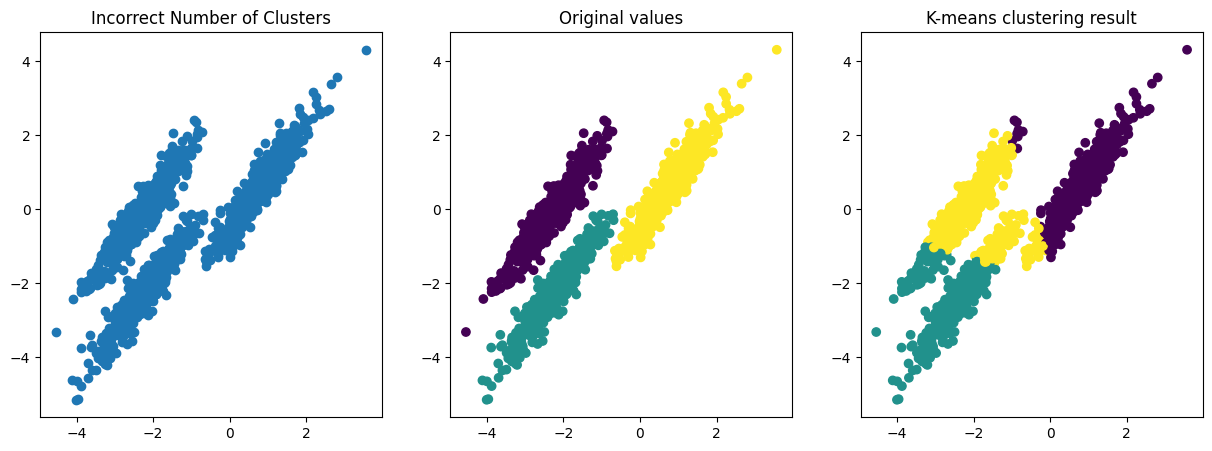

In [22]:
# Showing the sensitivity of Kmeans for anisotropic data

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)
transformation = [[0.5, 0.5], [-0.4, -0.8]]
X_aniso = np.dot(X, transformation)

model = KMeans(n_clusters=3, random_state=random_state, n_init="auto").fit(X_aniso)
y_pred = model.predict(X_aniso)

evaluate_clustering(X, y, y_pred, model)
plot_clustering(X_aniso, y, y_pred)

## Variance

External measures:

- Rand index: 0.84
- Adjusted Rand index: 0.64
- Normalized mutual information: 0.67
- Homogeneity: 0.65
- Completeness: 0.68
- V-measure: 0.67

Internal measures:

- Silhouette Coefficient: 1
- Calinski-Harabasz: 4009
- Davies-Bouldin: 1


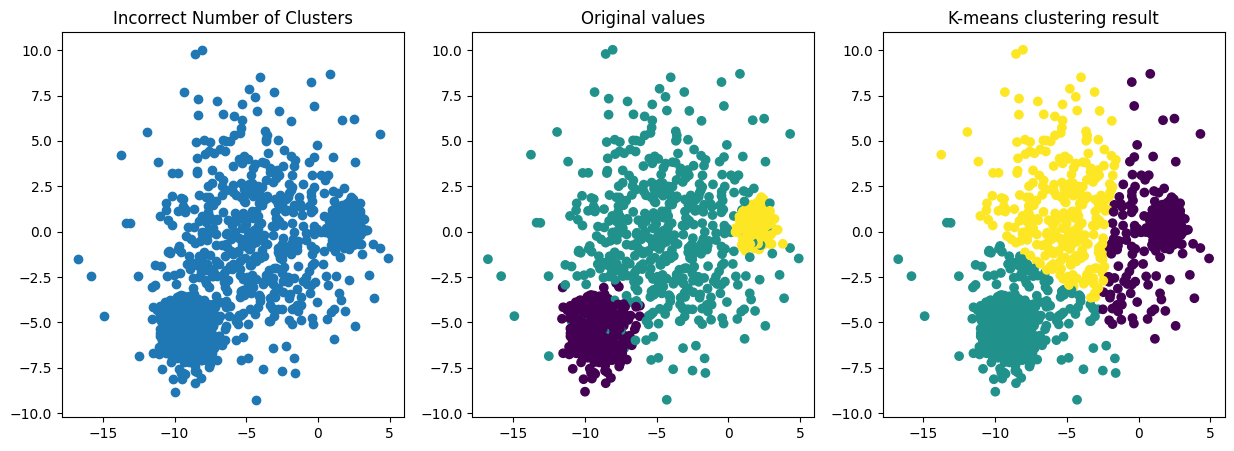

In [23]:
# Difficulties of Kmeans for variance in variances

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, cluster_std=[1.0, 3.5, 0.5], random_state=random_state, centers=3)
model = KMeans(n_clusters=3, random_state=random_state, n_init="auto").fit(X)
y_pred = model.predict(X)

evaluate_clustering(X, y, y_pred, model)
plot_clustering(X, y, y_pred)